# Mohammad Abu Shams 
# 1200549
# Section 2
# Dr. Yazan Abu Farha
# 30/11/2023

# Part1: Number of Features and Examples

In [2]:
import pandas as pd

# Load the file.
cars_df = pd.read_csv('cars.csv')

# Number of examples (rows) and features (columns).
num_of_features = cars_df.shape[1]
num_of_examples = cars_df.shape[0]

# Results.
print("Number of Features",num_of_features)
print("Number of Examples",num_of_examples)

Number of Features 8
Number of Examples 398


The first part of the assignment is to use Pandas to import the 'cars.csv' dataset into a DataFrame, thereby exposing the structure of the dataset. The quantity of features and samples is determined with the help of cars_df.shape, which offers a concise first picture of the dataset's size. Understanding the size and complexity of the dataset is a critical step in preparing it for additional data processing and analysis.

# Part2: Are there features with missing values? How many missing values are there in each one?

In [26]:
# Missing values. 
m_val = cars_df.isnull().sum()

# Results.
print("The missing values are:")
print(m_val)

The missing values are:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In Part 2, it was found that the 'cars.csv' dataset has missing values in two areas. 'Horsepower' is missing 6 values, and 'origin' is missing 2 values. Knowing where and how many missing values there are is important for preparing the data for further use.

# Part3: Fill the missing values in each feature

In [37]:
# Calculate mean, median, and mode for horsepower.
horsepower_mean = cars_df['horsepower'].mean()
horsepower_median = cars_df['horsepower'].median()
horsepower_mode = cars_df['horsepower'].mode()[0]

# For origin, calculate the mode.
origin_mode = cars_df['origin'].mode()[0]

# Imputing missing values.
# Using the mean for 'horsepower' as example of mean imputation.
cars_df['horsepower'].fillna(horsepower_mean, inplace=True)
# Using the mode for 'origin' is appropriate, given that it's a categorical attribute.
cars_df['origin'].fillna(origin_mode, inplace=True)

# Missing values.
m_val = cars_df.isnull().sum()

# Results.
print("Horsepower ** Mean:  %.3f" % horsepower_mean)
print("Horsepower ** Median:", horsepower_median)
print("Horsepower ** Mode:", horsepower_mode)
print("Origin ** Mode:", origin_mode)
print("\n The missing values after imputation are:")
print(m_val)

Horsepower ** Mean:  104.469
Horsepower ** Median: 95.0
Horsepower ** Mode: 150.0
Origin ** Mode: USA

 The missing values after imputation are:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


'Horsepower' and 'Origin' characteristics of the dataset were filled in Part 3 with missing values. For numerical data, "horsepower" numbers were imputed using the mean, or around 104.469. The mode ('USA') was utilized for the categorical 'origin' feature. These techniques guarantee data accuracy. In order to provide a reliable analysis, a last check verified that there were no more missing values.

# Part 4: Which country produces cars with better fuel economy

<Figure size 2500x1500 with 0 Axes>

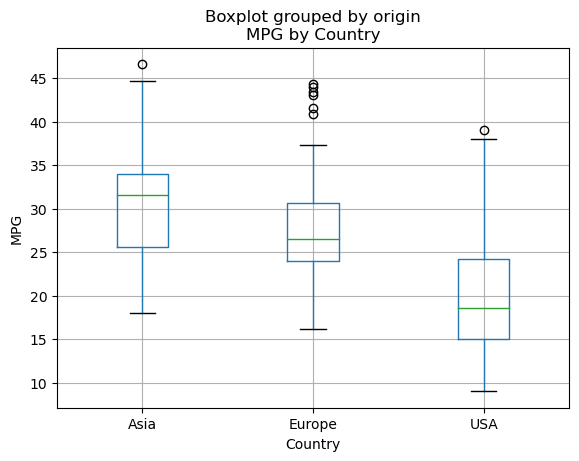

In [14]:
import matplotlib.pyplot as plt
# Considering 'origin' as the column indicating the country of manufacture, and 'mpg' as the metric for fuel efficiency.
# Using a box plot that shows the mpg for each country.

plt.figure(figsize=(25,15))
cars_df.boxplot(column='mpg', by='origin')
plt.title('MPG by Country')
plt.xlabel('Country')
plt.ylabel('MPG')
plt.show()

In Part 4, the miles per gallon (MPG) of automobiles across several nations was compared using a box plot. In order to determine which nation produces more fuel-efficient automobiles, the map displays variations in MPG according to the country where the cars are manufactured. This approach facilitates the identification of the most fuel-efficient automobiles in each nation. Asian countries produce cars with the better fuel economy compared to European and American cars.

# Part5: Which of the following features has a distribution that is most similar to a Gaussian: ‘acceleration’, ‘horsepower’, or ‘mpg’?

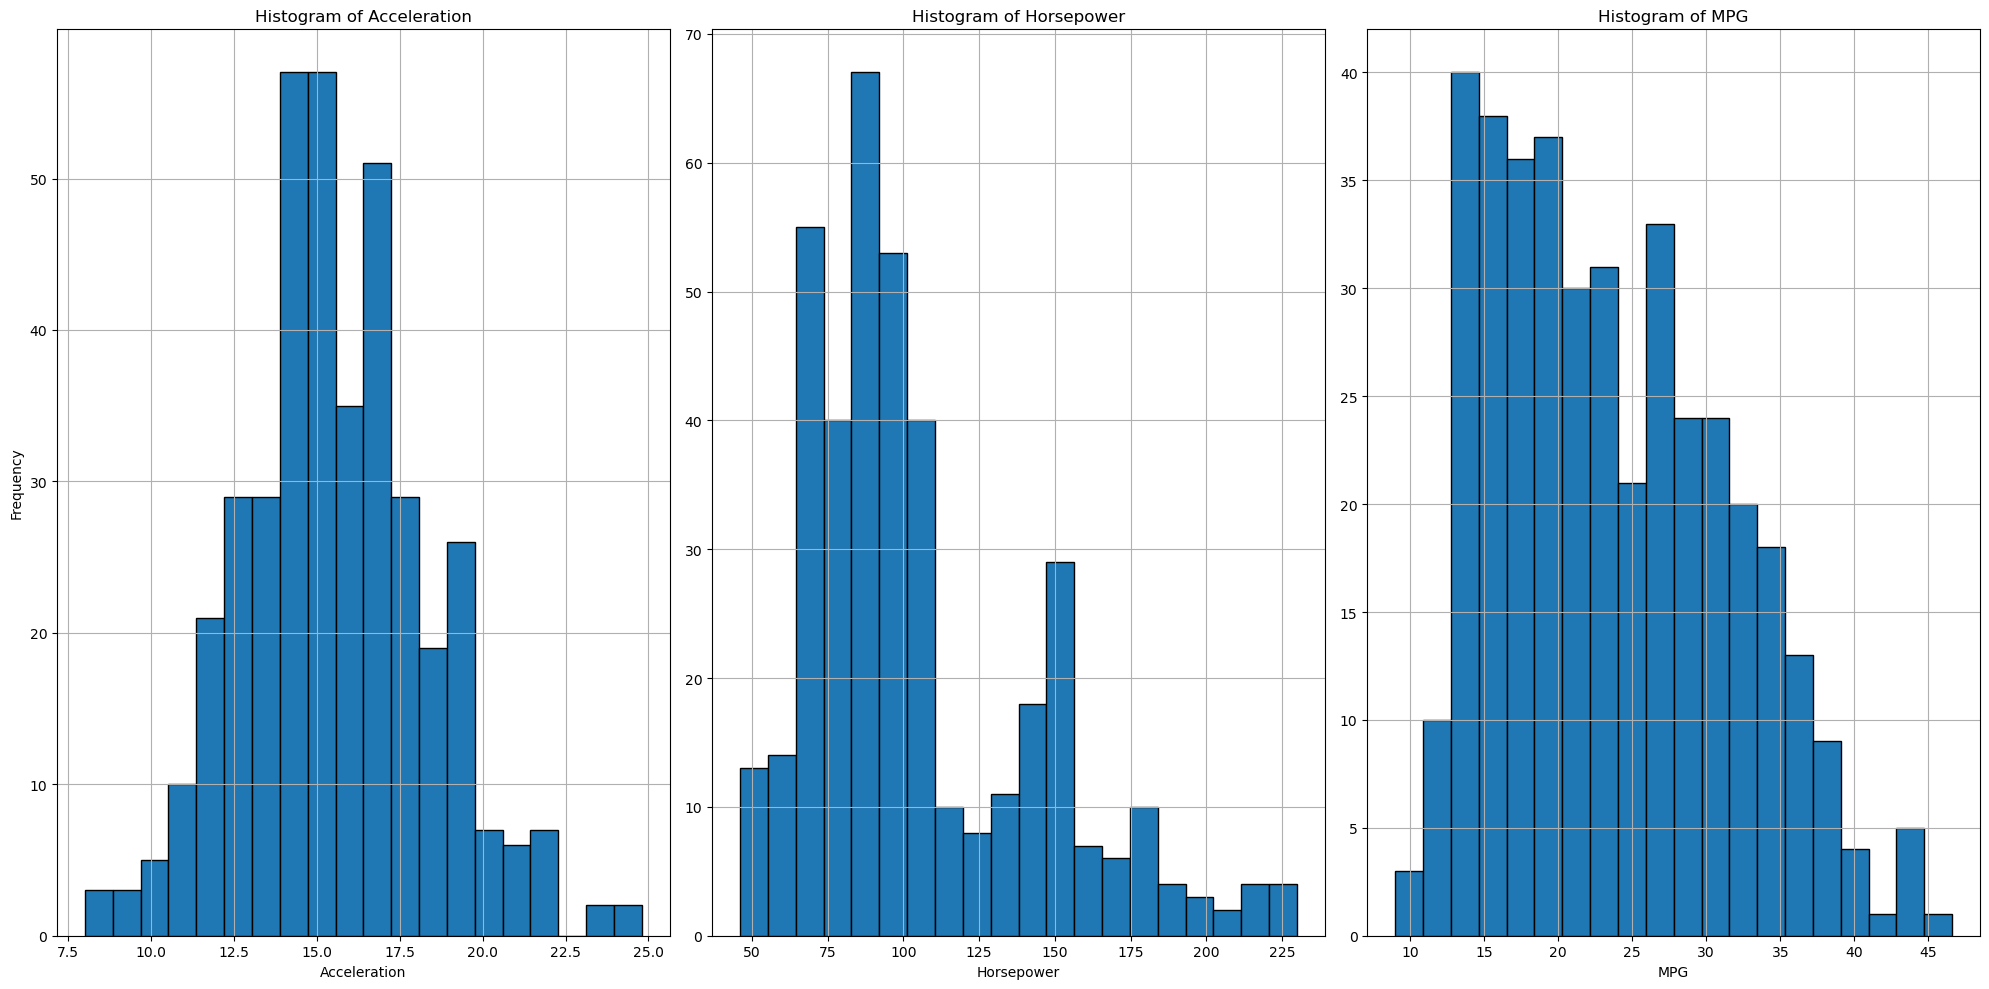

In [29]:
plt.figure(figsize=(20,10))

# Histogram for acceleration.
plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st subplot.
cars_df['acceleration'].hist(bins=20, edgecolor='black')
plt.title('Histogram of Acceleration')
plt.xlabel('Acceleration')
plt.ylabel('Frequency')

# Histogram for horsepower.
plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd subplot.
cars_df['horsepower'].hist(bins=20, edgecolor='black')
plt.title('Histogram of Horsepower')
plt.xlabel('Horsepower')

# Histogram for mpg.
plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd subplot.
cars_df['mpg'].hist(bins=20, edgecolor='black')
plt.title('Histogram of MPG')
plt.xlabel('MPG')

# Results.
plt.tight_layout()
plt.show()

Despite a little skew to the right, the distribution of "acceleration" is the most bell-shaped and symmetric around the center value, which is indicative of a Gaussian or normal distribution.

The distribution of "Horsepower" is biased to the right. It does not like a Gaussian distribution and is not symmetric.

In addition, "MPG" shows a distribution that is not Gaussian but rather right-skewed.

In light of these findings, "acceleration" is the one of the three qualities that most closely resembles a Gaussian distribution.

# Part6: using a quantitative measure.

In [28]:
from scipy.stats import skew, kurtosis
# Confirm that the 'horsepower' column has no remaining NaN values post-imputation.
# Replace any residual NaNs in 'horsepower' with the column's mean value.
cars_df['horsepower'].fillna(horsepower_mean, inplace=True)

# Calculate skewness and kurtosis.
acceleration_skewness = skew(cars_df['acceleration'].dropna())
horsepower_skewness = skew(cars_df['horsepower'].dropna())
mpg_skewness = skew(cars_df['mpg'].dropna())

acceleration_kurtosis = kurtosis(cars_df['acceleration'].dropna())
horsepower_kurtosis = kurtosis(cars_df['horsepower'].dropna())
mpg_kurtosis = kurtosis(cars_df['mpg'].dropna())

# Results.
print("Acceleration - Skewness: %.3f, Kurtosis: %.3f" % (acceleration_skewness, acceleration_kurtosis))
print("Horsepower - Skewness: %.3f, Kurtosis: %.3f" % (horsepower_skewness, horsepower_kurtosis))
print("MPG - Skewness: %.3f, Kurtosis: %.3f" % (mpg_skewness, mpg_kurtosis))

Acceleration - Skewness: 0.278, Kurtosis: 0.399
Horsepower - Skewness: 1.091, Kurtosis: 0.729
MPG - Skewness: 0.455, Kurtosis: -0.519


Skewness: A symmetric distribution is indicated by a skewness value that is near to zero. In terms of symmetry, the distribution resembles a Gaussian distribution more when it is closer to 0.

Kurtosis: A distribution with tails resembling a Gaussian distribution is indicated by a kurtosis value near 0. In comparison to a Gaussian, a positive kurtosis denotes heavier tails while a negative kurtosis denotes lighter tails. About the attributes:

The skewness and kurtosis of "acceleration" are around 0.278 and 0.399, respectively. These values are near zero, suggesting a very symmetric distribution with a moderate tail weight, similar to a Gaussian distribution.

The skewness and kurtosis of "Horsepower" are around 1.091 and 0.729, respectively. In comparison to a Gaussian distribution, the higher skewness denotes a more asymmetrical distribution, while the positive kurtosis implies heavier tails.

"MPG" has a kurtosis of -0.519 and a skewness of around 0.455. Here the skewness is larger than for 'acceleration', suggesting less symmetry, and the negative kurtosis suggests lighter tails than in a Gaussian distribution.

As a result, among the three characteristics, "acceleration" has the skewness and kurtosis values that are closest to zero, indicating that its distribution is the most Gaussian-like.


# Part7: Plot a scatter plot that shows the ‘horsepower’ on the x-axis and ‘mpg’ on the y-axis. 

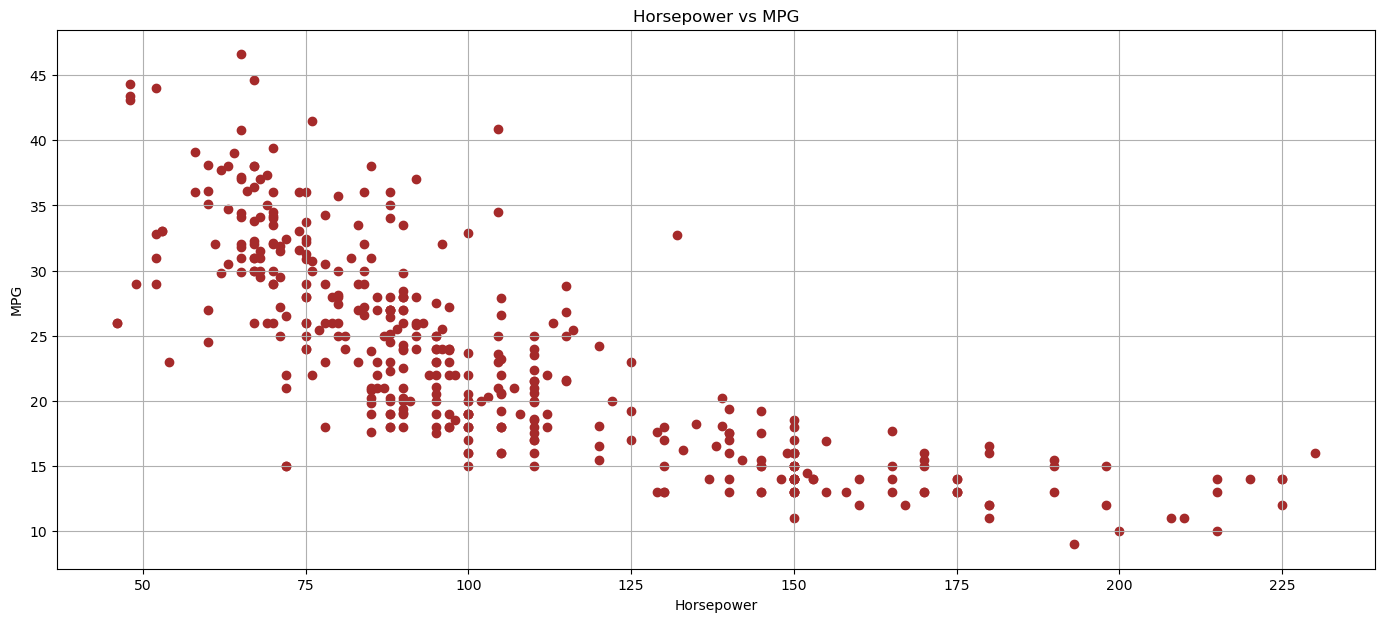

In [45]:
plt.figure(figsize=(17, 7))
plt.scatter(cars_df['horsepower'], cars_df['mpg'], color='brown')
plt.title('Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

The figure seems to indicate a negative association between "horsepower" and "MPG," which means that "MPG" tends to drop as "horsepower" rises. Cars with more horsepower often use less gasoline, according to this inverse association.

# Part8: Implement the closed form solution of linear regression and use it to learn a linear model to predict the ‘mpg’ from the ‘horsepower’. Plot the learned line on the same scatter plot you got in part 7.

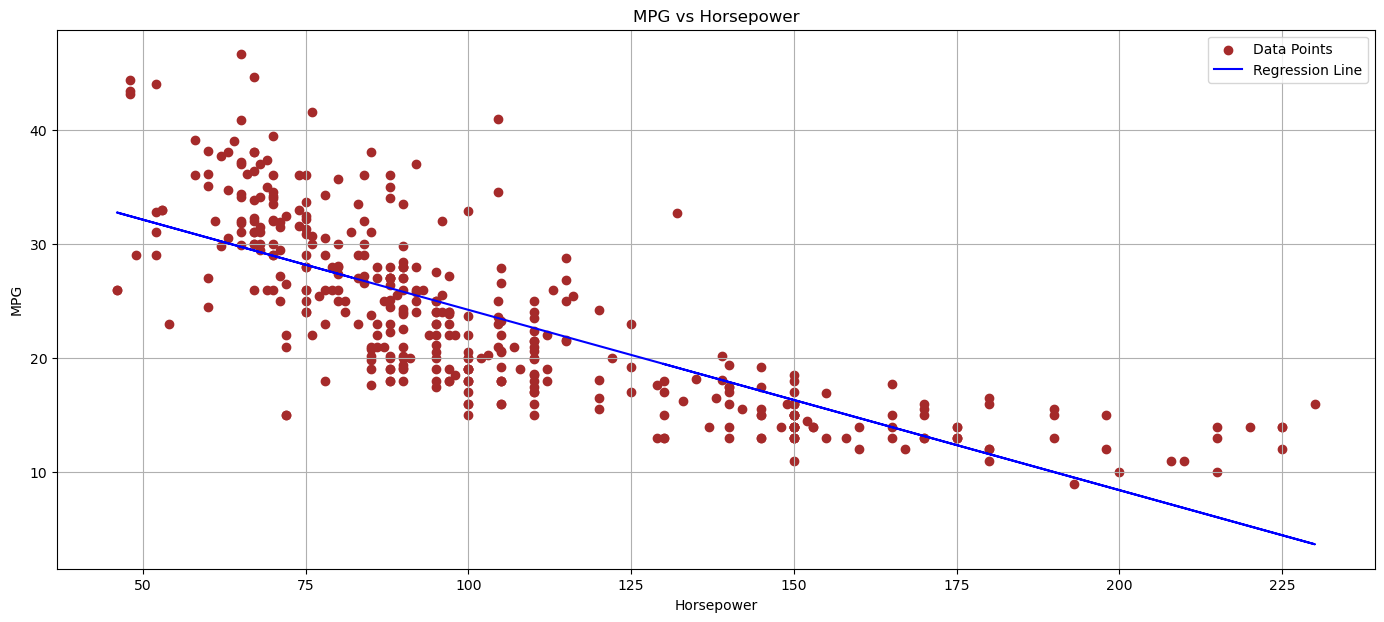

In [54]:
import numpy as np

# Prepare the data for linear regression.
X_b = np.c_[np.ones((len(cars_df), 1)), cars_df['horsepower']]  # x0 = 1 
y = cars_df['mpg'].values

# Calculate the theta_b using the normal equation.
theta_b = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Plotting the scatter plot and regression line.
plt.figure(figsize=(17, 7))
plt.scatter(cars_df['horsepower'], y, color='brown', marker='o', label='Data Points')
plt.plot(cars_df['horsepower'], X_b @ theta_b, color='blue', label='Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower')
plt.legend()
plt.grid(True)
plt.show()

'horsepower' was used to develop a basic linear regression model that predicted car'mpg' (miles per gallon). Initially, a formula (normal equation) was used to do the necessary computations. Next, a graph illustrating the correlation between "mpg" and "horsepower" was created. It displays the real data points together with the model's predictions as a red line, illustrating the relationship between 'horsepower' and'mpg'.

# Part9: Repeat part 8 but now learn a quadratic function of the form f = w0 + w1x + w2x^2.

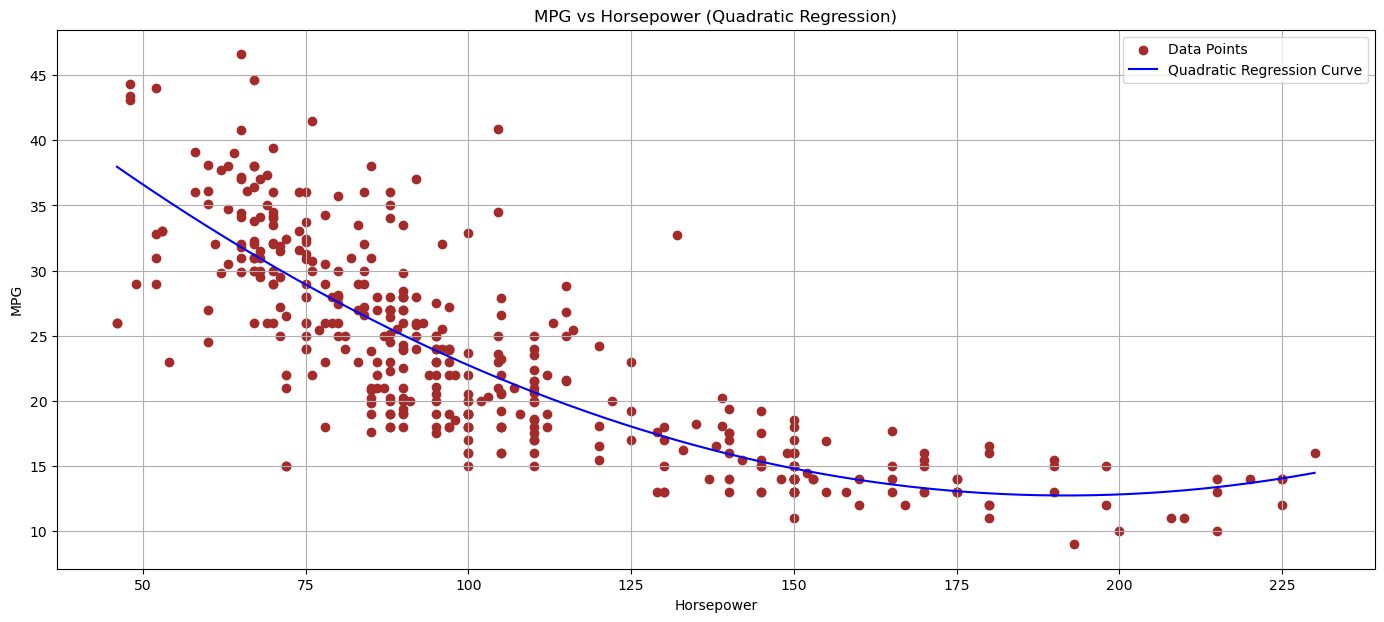

In [70]:
# Ensure the 'horsepower' data is formatted as numeric values.
cars_df['horsepower'] = pd.to_numeric(cars_df['horsepower'], errors='coerce')

# Remove rows containing NaN values that may have arisen following the data conversion.
cars_df.dropna(subset=['horsepower', 'mpg'], inplace=True)

# Preparing the data for quadratic regression.
X_quad = np.c_[np.ones((len(cars_df), 1)), cars_df['horsepower'], cars_df['horsepower']**2]
y = cars_df['mpg'].values

# Calculate parameters for quadratic regression using the normal equation method.
theta_quad = np.linalg.inv(X_quad.T.dot(X_quad)).dot(X_quad.T).dot(y)

# Generate predictions using the quadratic model over the entire range of horsepower values.
horsepower_range = np.linspace(cars_df['horsepower'].min(), cars_df['horsepower'].max(), 200)
X_quad_range = np.c_[np.ones(horsepower_range.shape[0]), horsepower_range, horsepower_range**2]
y_range_pred = X_quad_range.dot(theta_quad)

# Plotting.
plt.figure(figsize=(17, 7))
plt.scatter(cars_df['horsepower'], cars_df['mpg'], color='brown', marker='o', label='Data Points')
plt.plot(horsepower_range, y_range_pred, color='blue', label='Quadratic Regression Curve')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower (Quadratic Regression)')
plt.legend()
plt.grid(True)
plt.show()

Car'mpg' was predicted from 'horsepower' using quadratic regression. The 'horsepower' and its square were included in the model when the data was properly structured. More accurately than a straight line, this model depicts the link between "horsepower" and "mpg." The final graph illustrates how'mpg' varies with varying amounts of 'horsepower' by displaying both the actual data points and a curve that represents the model's projections.

# Part10: Repeat part 8 (simple linear regression case) but now by implementing the gradient descent algorithm instead of the closed form solution.


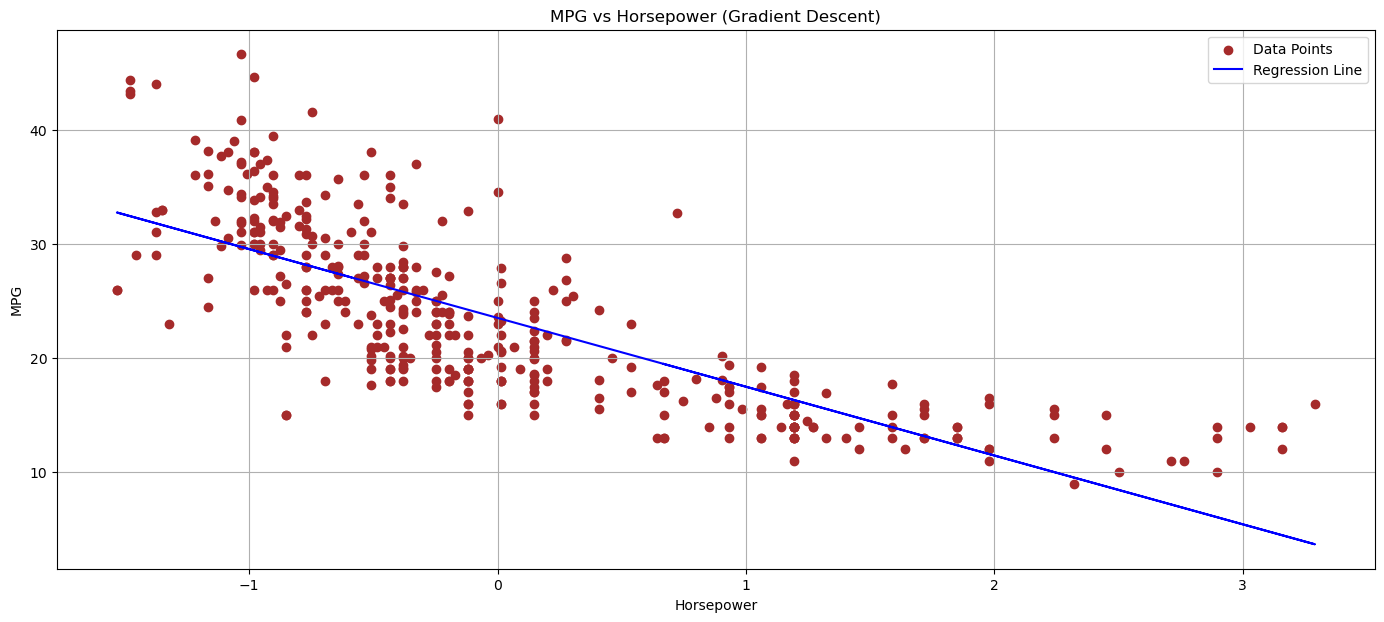

In [69]:
# Standardization of Feature Scaling.
X = (cars_df['horsepower'].values - np.mean(cars_df['horsepower'].values)) / np.std(cars_df['horsepower'].values)
y = cars_df['mpg'].values
m = len(y)

# x0 = 1.
X_b = np.c_[np.ones((m, 1)), X]

# Gradient Descent settings.
learning_rate = 0.01  # Adjusted learning rate.
iterations = 10000   # More iterations.
theta = np.random.randn(2, 1)  # Random initialization.

# Gradient Descent.
for iteration in range(iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y.reshape(-1, 1))
    theta = theta - (learning_rate * gradients)

# Plotting.
plt.figure(figsize=(17, 7))
plt.scatter(X, y, color='brown', marker='o', label='Data Points')
plt.plot(X, X_b.dot(theta), color='blue', label='Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower (Gradient Descent)')
plt.legend()
plt.grid(True)
plt.show()

Gradient descent was used to develop a basic linear regression model that predicted'mpg' from 'horsepower'. 'Horsepower' was first standardized to improve algorithm performance. The best fit line was then discovered using gradient descent, a methodical improvement procedure. In order to decrease mistakes, this approach iteratively adjusted from a random estimate at the beginning. The last graph demonstrates how the model predicts'mpg' based on 'horsepower' by displaying the regression line alongside the actual data.